In [69]:
import sklearn
from sklearn.model_selection import train_test_split #训练集测试集划分 
from sklearn.linear_model import LinearRegression  #线形回归模型
from sklearn.preprocessing import StandardScaler  #数据标准化
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [70]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [71]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path = 'datas/household_power_consumption_1000.txt'
df = pd.read_csv(path,sep= ";",low_memory=False)#没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率)
names=['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [72]:
#异常数据处理(异常数据过滤)
new_df = df.replace('?',np.nan) #替换非法字符为np.nan
datas = new_df.dropna(axis=0,how='any') #只要有一个数据为空，就进行删删除操作
print('数据统计指标表')
print(datas.describe())

数据统计指标表
       Global_active_power  Global_reactive_power     Voltage  \
count          1000.000000            1000.000000  1000.00000   
mean              2.418772               0.089232   240.03579   
std               1.239979               0.088088     4.08442   
min               0.206000               0.000000   230.98000   
25%               1.806000               0.000000   236.94000   
50%               2.414000               0.072000   240.65000   
75%               3.308000               0.126000   243.29500   
max               7.706000               0.528000   249.37000   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count       1000.000000          1000.0     1000.000000     1000.000000  
mean          10.351000             0.0        2.749000        5.756000  
std            5.122214             0.0        8.104053        8.066941  
min            0.800000             0.0        0.000000        0.000000  
25%            8.400000             

In [83]:
#穿件一个时间函数格式化字符串
def date_format(dt):
    import time
    t = time.strptime(' '.join(dt),'%d/%m/%Y %H:%M:%S') # 16/12/2006  17:24:00
    return (t.tm_year,t.tm_mon,t.tm_mday,t.tm_hour,t.tm_min,t.tm_sec)

In [84]:
#获取x和y变量，并将时间转换为数值型连续变量
X = datas.iloc[:,0:2]
X = X.apply(lambda x: pd.Series(date_format(x)),axis=1)
Y = datas['Global_active_power']

In [85]:
##对数据集进行测试几何训练集划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [86]:
#数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) #训练并转换
X_test = ss.transform(X_test) ##直接使用在模型构建数据上进行一个数据标准化操作

In [87]:
##模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) ##训练模型
##模型校验
y_predict = lr.predict(X_test) ##预测结果 y = theta0+theta1X_1
print("准确率：",lr.score(X_train, Y_train))
mse = np.average((y_predict - Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:", rmse)
print("特征的系数为：",list(zip(names,lr.coef_)))

准确率： 0.244093118059
rmse: 1.16409234597
特征的系数为： [('Date', 0.0), ('Time', -2.7755575615628914e-16), ('Global_active_power', -1.4158816617332373), ('Global_reactive_power', -0.93495324324956397), ('Voltage', -0.10214075598496969), ('Global_intensity', 0.0)]


In [88]:
##模型数据保存/持久化
from sklearn.externals import joblib
joblib.dump(ss,"datas/data_ss.model") ##将标准化模型保存
joblib.dump(lr,"datas/data_lr.model") #将模型保存
joblib.load("datas/data_ss.model") #加载模型
joblib.load("datas/data_lr.model") #加载模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

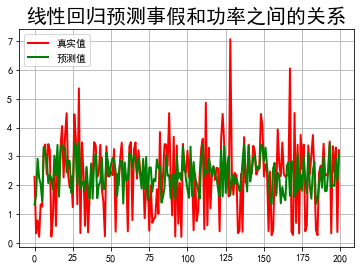

In [89]:
##预测值和实际值画图比较
t = np.arange(len(X_test)) #把x转化为位置点t
plt.figure(facecolor='w') #建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-',linewidth=2, label='真实值') #画出t和y测试集，用红色连接
plt.plot(t,y_predict,'g-',linewidth=2,label='预测值') #画出t和y的预测集，用绿色线连接
plt.legend(loc='upper left') #显示图例，设置图例的位置
plt.title("线性回归预测事假和功率之间的关系",fontsize=20) #添加标题
plt.grid(b=True) #添加网格
plt.show() #显示图像

## 功率和电流之间的关系

In [90]:
X = datas.iloc[:,2:4]
Y2 = datas.iloc[:,5]

电流预测准确率:  0.992042060971
电流参数: [ 5.07744316  0.07191391]


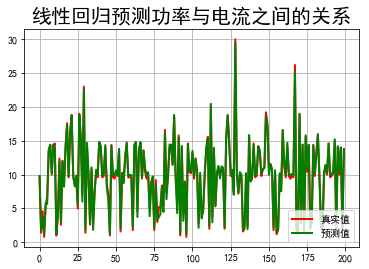

In [91]:
## 数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

## 数据归一化
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train) # 训练并转换
X2_test = scaler2.transform(X2_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

## 模型训练
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train) ## 训练模型

## 结果预测
Y2_predict = lr2.predict(X2_test)

## 模型评估
print("电流预测准确率: ", lr2.score(X2_test,Y2_test))
print("电流参数:", lr2.coef_)

## 绘制图表
#### 电流关系
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, Y2_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

## 时间和电压之间的关系（Linear-多项式）

1阶，系数为： [  2.39926650e+02   0.00000000e+00  -2.22044605e-16   3.97781449e+00
   8.73334650e-01   1.70647992e-01   0.00000000e+00]
2阶，系数为： [  1.23998300e+02  -7.10542736e-15   2.13162821e-14   5.34497071e+01
   2.95068077e+00   2.69407641e-01   1.77635684e-15   1.77635684e-15
   8.88178420e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.02461452e+02  -2.50100464e+01
  -5.18469319e-01   0.00000000e+00  -1.02427364e+01  -4.65982219e-01
   0.00000000e+00  -3.55472266e-02   0.00000000e+00   0.00000000e+00]
3阶，系数为： [  2.33041188e+12  -2.45142487e+10  -1.75804534e+11  -1.26959374e+13
   3.30511730e+12  -1.12292337e+11   2.13285640e+11   5.16430033e+10
  -6.93010506e+10   1.18836188e+10   1.12333028e+11  -1.09097641e+11
  -4.62948547e+10  -1.43137841e+11  -5.13990902e+10  -4.53192649e+10
  -6.46722463e+09   0.00000000e+00   2.40688614e+12  -1.33175302e+12
   4.52467025e+10   0.000

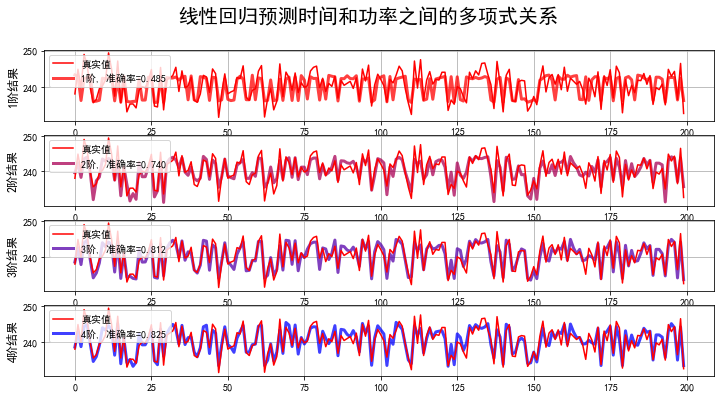

In [99]:
models = [
    
    Pipeline([
        ('Poly', PolynomialFeatures()),
        ('Linear', LinearRegression(fit_intercept=False))
    ])
]
model = models[0]
#获取x,y变量并将时间转为连续型变量
X = datas[names[0:2]]
X = X.apply(lambda x: pd.Series(date_format(x)), axis=1)
Y = datas[names[4]]
#对数据集进行测试集合，训练集划分
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#数据标准化
ss = StandardScaler()
X_train = ss.fit_transform(X_train) #训练并转换
X_test = ss.transform(X_test) ##直接使用在模型构建数据上进行一个数据标准化操作

##模型训练
t = np.arange(len(X_test))
N = 5
d_pool = np.arange(1,N,1) #阶
m = d_pool.size
clrs = []  #颜色
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' %int(c))
plt.figure(figsize=(12,6),facecolor='w') #创建一个绘图窗口，设置大小，设置颜色
for i, d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1)#控制画图位置 n-1代表有行数，1代表列数，i+1代表位置
    plt.plot(t, Y_test, 'r-', label=u'真实值', zorder=N)#绘制t 和 y测试集 用红色线连接  zorder表示画图顺序 1是第一位 2是第二位
    model.set_params(Poly__degree=d) # 设置多项式的阶乘
    lin = model.get_params('Linear')['Linear']
    #模型训练并打印系数
    model.fit(X_train, Y_train)
    output = u'%d阶，系数为：' % d
    print (output, lin.coef_.ravel())
    #模型预测 并输出得分
    y_hat = model.predict(X_test)
    s = model.score(X_test, Y_test)
    
    label = u'%d阶, 准确率=%.3f' % (d,s)
    plt.plot(t, y_hat, color=clrs[i], lw=3, alpha=0.75, label=label)
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.ylabel(u'%d阶结果' % d, fontsize=12)
##预测值和实际值画图比较
plt.suptitle(u'线性回归预测时间和功率之间的多项式关系',fontsize=20)
plt.grid(b=True)
plt.show()